# Predicting NaNoWriMo winners with Logistic Regression

As the variable I want to predict is binary (1 if a writer is a winner, 0 if otherwise) I decided to use a logistic regression as my prediction model.  

In [2]:
# import the data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

writers = pd.read_csv("../clean data/user_summary_no2015.csv", index_col=0)
writers.head()

,Writer Name,Member Length,LifetimeWordCount,url,Age,Birthday,Favorite books or authors,Favorite noveling music,Hobbies,Location,...,Expected Max Submission,Expected Max Day,Expected Std Submissions,Expected Consec Subs,FW Total,FW Sub,FH Total,FH Sub,SH Total,SH Sub
0,Nicaless,2,50919,http://nanowrimo.org/participants/nicaless,24,December 20,"Ursula Le Guin, J.K.","Classical, Musicals","Reading, Video Games, Blogging, Learning","San Francisco, CA",...,24935.0,28.000000,6235.712933,12.000000,6689,6,12486,9,11743,3
1,Rachel B. Moore,10,478090,http://nanowrimo.org/participants/rachel-b-moore,NaN,NaN,"2666, Unaccustomed Earth, Exit Music, Crazy Lo...","Belle and Sebastian, Elliott Smith, PJ Harvey,...","Reading, volunteering, knitting, listening to ...",San Francisco,...,3809.0,9.000000,1002.295167,6.800000,16722,7,24086,14,26517,14
2,abookishbabe,1,0,http://nanowrimo.org/participants/abookishbabe,NaN,April 2,"Colleen Hoover, Veronica Roth, Jennifer Niven,...",Tori Kelley,"Reading (DUH), Day dreaming, Going to Disneyla...","Sacramento, CA",...,NaN,NaN,NaN,NaN,28632,1,29299,2,0,0
3,alexabexis,11,475500,http://nanowrimo.org/participants/alexabexis,NaN,NaN,NaN,Three Goddesses playlist Florence + the Machin...,"drawing, reading, movies & TV shows, comics, p...",New York City,...,2325.0,8.545455,570.626795,8.090909,25360,7,38034,12,40766,9
4,AllYellowFlowers,3,30428,http://nanowrimo.org/participants/AllYellowFlo...,NaN,NaN,"Lolita, Jesus' Son, Ask the",the sound of the coffeemaker,cryptozoology,Allston,...,2054.5,4.500000,538.273315,21.000000,1800,5,5300,10,5700,9


In [3]:
writers.columns

Index([u'Writer Name', u'Member Length', u'LifetimeWordCount', u'url', u'Age',
       u'Birthday', u'Favorite books or authors', u'Favorite noveling music',
       u'Hobbies', u'Location', u'Occupation', u'Primary Role',
       u'Sponsorship URL', u'Expected Final Word Count',
       u'Expected Daily Average', u'CURRENT WINNER', u'Current Donor', u'Wins',
       u'Donations', u'Participated', u'Consecutive Donor',
       u'Consecutive Wins', u'Consecutive Part', u'Part Years', u'Win Years',
       u'Donor Years', u'Num Novels', u'Expected Num Submissions',
       u'Expected Avg Submission', u'Expected Min Submission',
       u'Expected Min Day', u'Expected Max Submission', u'Expected Max Day',
       u'Expected Std Submissions', u'Expected Consec Subs', u'FW Total',
       u'FW Sub', u'FH Total', u'FH Sub', u'SH Total', u'SH Sub'],
      dtype='object')

In [4]:
# convert primary role and sponsorship url to binary vars
writers['Primary Role'][writers['Primary Role'] == 'Municipal Liaison'] = 1
writers['Primary Role'][writers['Primary Role'] != 1] = 0

writers['Sponsorship URL'].fillna(0, inplace=True)
writers['Sponsorship URL'][writers['Sponsorship URL'] != 0] = 1

In [5]:
# let's keep ALL NUMERIAL COLUMNS except the CURRENT WINNER column which we will use as response
features = writers._get_numeric_data()

In [6]:
del features['CURRENT WINNER']
features.head()

,Member Length,LifetimeWordCount,Age,Expected Final Word Count,Expected Daily Average,Current Donor,Wins,Donations,Participated,Consecutive Donor,...,Expected Max Submission,Expected Max Day,Expected Std Submissions,Expected Consec Subs,FW Total,FW Sub,FH Total,FH Sub,SH Total,SH Sub
0,2,50919,24,50919.000000,1697.300000,0,1,1,1,1,...,24935.0,28.000000,6235.712933,12.000000,6689,6,12486,9,11743,3
1,10,478090,NaN,47809.000000,1593.633333,1,8,8,10,8,...,3809.0,9.000000,1002.295167,6.800000,16722,7,24086,14,26517,14
2,1,0,NaN,NaN,NaN,1,0,0,0,0,...,NaN,NaN,NaN,NaN,28632,1,29299,2,0,0
3,11,475500,NaN,43227.272727,1440.909091,1,7,7,11,4,...,2325.0,8.545455,570.626795,8.090909,25360,7,38034,12,40766,9
4,3,30428,NaN,15214.000000,507.133333,0,0,0,2,0,...,2054.5,4.500000,538.273315,21.000000,1800,5,5300,10,5700,9


In [7]:
y = writers['CURRENT WINNER'].values

In [8]:
# inputting 0 for users without prior data for daily avg, avg submission, num submissions etc. and so are marked NaN
features.fillna(0, inplace=True)
features.describe()

,Member Length,LifetimeWordCount,Age,Expected Final Word Count,Expected Daily Average,Current Donor,Wins,Donations,Participated,Consecutive Donor,...,Expected Max Submission,Expected Max Day,Expected Std Submissions,Expected Consec Subs,FW Total,FW Sub,FH Total,FH Sub,SH Total,SH Sub
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.212575,172552.676647,8.596806,36428.312194,1214.277073,0.317365,2.606786,1.421158,3.656687,1.047904,...,4764.389341,10.005534,1314.411102,9.573348,12203.137725,4.413174,20962.403194,8.137725,17100.556886,6.520958
std,3.255209,329113.331830,14.463648,43782.218313,1459.407277,0.465916,4.651782,3.044384,4.899582,1.760029,...,5727.358954,8.406292,2011.241171,8.393503,39000.987493,2.614373,54462.877403,5.140330,21562.099582,6.259238
min,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,9818.000000,0.000000,7443.250000,248.108333,0.000000,0.000000,0.000000,1.000000,0.000000,...,955.000000,1.000000,256.685927,0.000000,2258.000000,2.000000,3925.000000,3.000000,0.000000,0.000000
50%,4.000000,93385.000000,0.000000,37594.333333,1253.144444,0.000000,1.000000,0.000000,2.000000,0.000000,...,3546.500000,9.333333,873.018486,8.500000,7890.000000,5.000000,15212.000000,10.000000,10900.000000,5.000000
75%,6.000000,206482.000000,20.000000,50734.200000,1691.140000,1.000000,3.000000,2.000000,5.000000,1.000000,...,6250.000000,16.200000,1516.145753,16.000000,12361.000000,7.000000,23832.000000,13.000000,28005.000000,13.000000
max,13.000000,4562712.000000,61.000000,651816.000000,21727.200000,1.000000,52.000000,36.000000,52.000000,9.000000,...,51238.000000,30.000000,23874.872328,30.000000,630036.000000,7.000000,1000000.000000,14.000000,210000.000000,16.000000


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Normalize data

In [10]:
scaler = StandardScaler()
features_norm = scaler.fit_transform(features)
features_norm[1]

array([ 1.77967343,  0.92929298, -0.5949674 ,  0.26019839,  0.26019839,
        1.46660949,  1.16054543,  2.1631367 ,  1.29595831,  3.95393831,
        1.98638802,  2.35830378,  1.92083955, -0.29678396, -0.38505565,
       -0.01942619,  0.25599572, -0.16697823, -0.11973645, -0.15534084,
       -0.33074635,  0.11598114,  0.99045236,  0.05741009,  1.14158714,
        0.43714921,  1.19607487])

### Apply Logistic Regression

In [33]:
X_train, X_test, y_train, y_test = train_test_split(features_norm,y, test_size=0.2, random_state=0)

In [34]:
model_lr = LogisticRegression(C=5)
cross_val_score(model_lr,X_train, y_train,cv=10).mean()

0.97749374609130713

Wow! That's a very good cross validation score! Now let's check out the model's confusion matrix and classification report and how well it does predicting the targets of the test data.



In [35]:
model_lr.fit(X_train,y_train)
print confusion_matrix(y_test,model_lr.predict(X_test))
print classification_report(y_test,model_lr.predict(X_test))
print model_lr.score(X_test,y_test)

[[51  4]
 [ 0 46]]
             precision    recall  f1-score   support

          0       1.00      0.93      0.96        55
          1       0.92      1.00      0.96        46

avg / total       0.96      0.96      0.96       101

0.960396039604


This Logistic Regression correctly identified all the non-winners in the test data, and only incorrectly identified winners in the test data 8% of the time.  I'd say it's a pretty good model!

### Visualize the results of the Logistic Regression PCA

In [42]:
from matplotlib.colors import ListedColormap
%matplotlib inline

There are a lot of features in this data set, so let's use Principal Components Analysis to decompose the data into 2 dimensions so it's easy to visualize.

In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [43]:
features_pca = pca.fit(features_norm).transform(features_norm)
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(features_pca,y, test_size=0.2, random_state=0)
preds = LogisticRegression(C=5).fit(pca_X_train, pca_y_train).predict(pca_X_test)

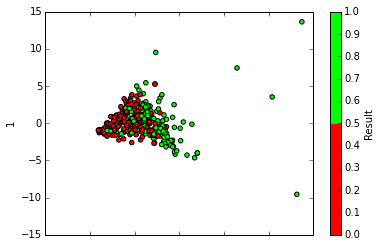

In [45]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
df1 = pd.DataFrame(pca_X_train)
df1['Result'] = pca_y_train
df1.plot(kind='scatter', x=0, y=1, c='Result', colormap = cmap_bold)

Above are the first and second principal components of the train data set, colored by the winners and non-winners.

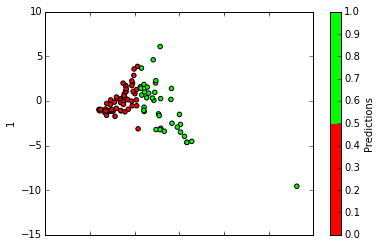

In [48]:
df2 = pd.DataFrame(pca_X_test)
df2['Predictions'] = preds
df2.plot(kind='scatter', x=0, y=1, c='Predictions', colormap = cmap_bold)

Here's how the Logistic Regression splits the decomposed test data.  Let's compare it with the actual results of the test data.

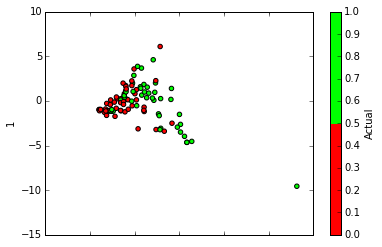

In [50]:
df2 = pd.DataFrame(pca_X_test)
df2['Actual'] = pca_y_test
df2.plot(kind='scatter', x=0, y=1, c='Actual', colormap = cmap_bold)

The Logistic Regression did pretty well generalizing the data and sorting out the winners and non-winners of NaNoWriMo.  

Now let's try using a Decision Tree to classify winners and non-winners.

In [57]:
from sklearn.tree import DecisionTreeClassifier

In [58]:
model_dt = DecisionTreeClassifier(max_depth=5)
print cross_val_score(model_dt, X_train, y_train, cv=10).mean()

model_dt.fit(X_train, y_train)
print confusion_matrix(y_test, model_dt.predict(X_test))
print classification_report(y_test,model_dt.predict(X_test))
print model_dt.score(X_test, y_test)

0.969676360225
[[50  5]
 [ 0 46]]
             precision    recall  f1-score   support

          0       1.00      0.91      0.95        55
          1       0.90      1.00      0.95        46

avg / total       0.96      0.95      0.95       101

0.950495049505


The decision tree also performs pretty well in predicting winners and non-winners. Let's see what features it found to be most predictive.

In [59]:
dt_importances = pd.DataFrame(zip(features.columns, model_dt.feature_importances_))
dt_importances.sort_values(1, ascending=False).head() # most to least predictive  

,0,1
25,SH Total,0.795322
23,FH Total,0.184662
18,Expected Max Day,0.015199
14,Expected Avg Submission,0.004818
0,Member Length,0.000000


SH Total, and FH Total are the most predictive features, but these are metrics collected after the current contest has started.  Let's build a model now with just information we have from past contests and see how that works.  